# raytracer-imaging
For PET image reconstruction

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import math
import numpy as np
from numba import cuda,types, from_dtype
import raytracer.cudaOptions
from raytracer.rotation.quaternion import *
from raytracer.raytracer.voxel import *
from raytracer.raytracer.raytrace import *

In [8]:
data_rays = 0.1*np.loadtxt(rayOptions.data_directory).T # x,y,z [mm,ns]

In [9]:
data_rays[0,:]

array([ 1.25919873e+01,  3.83040441e+01,  6.31215088e+01, -1.09195679e-03,
       -1.19435828e+01, -3.80859543e+01,  3.92091003e+01, -1.19018558e-03])

In [13]:
voxel_size = np.array([10,10,100]) #odd so we have center point
raytracerA = raytracer(voxel_size,method="ART")

100%|███████████████████████████████████████████████████████████████████████████████| 800/800 [00:05<00:00, 139.75it/s]


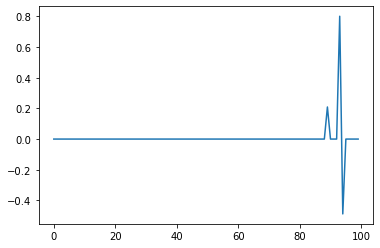

In [18]:
#Reconstruction:
projection_error = raytracerA.reconstruct(data_rays[0:100],iterations=8)

[ 0.70710678  0.         -0.70710678  0.        ]


(array([0, 0, 0, ..., 0, 0, 0]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0., 0., 0., ..., 0., 0., 0.]))

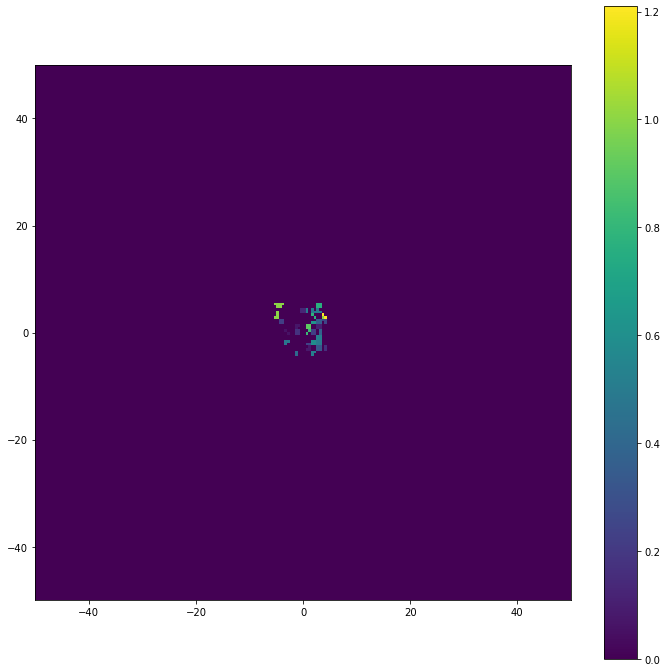

In [21]:
# rayNHit,rayHits,rayWeights = raytracerA.norm_raytrace(0.0*np.pi/180.0,90.0*np.pi/180.0)
# projection = raytracerA.rayproject(rayNHit,rayHits)
raytracerA.make_projection(phi=0.0*np.pi/180.0,alpha=90.0*np.pi/180.0)

In [ ]:
print(rayNHit)
print("---")
print(nvoxels,camera_nrays)
print(rayHits.shape)
print("---")
count = 0
# for r in range(100):
#     if rayNHit[r] > 0:
#         print(rayHits[r,0:rayNHit[r]])
# print("---")
# for r in range(100):
#     if rayNHit[r] > 0:
#         print(rayWeights[r,0:rayNHit[r]])
# print("---")
print(np.sum(rayNHit > 0))

In [16]:
quaternion.rotate(verts,20.*np.pi/180.0,40.*np.pi/180.0)
print(verts)

[[  5.65491516 -24.54622352 -35.22080132]
 [  5.05089239 -24.76606983 -34.45475688]
 [  4.44686962 -24.98591614 -33.68871243]
 ...
 [ -4.22067301  24.0040672   32.27988038]
 [ -4.82469578  23.78422089  33.04592482]
 [ -5.42871856  23.56437457  33.81196927]]


C:\Users\sadam\AppData\Roaming\Python\Python38\site-packages\numba\cuda\cudadrv\devicearray.py:790: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


ValueError: Argument filled must be 3-dimensional

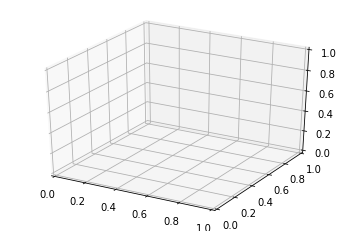

In [17]:
# set the colors of each object
colors = np.empty(verts.shape, dtype=object)
colors = 'red'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(verts, facecolors=colors, edgecolor='k')
plt.show()

In [ ]:
ax = plt.figure().add_subplot()
ax.scatter(verts[:,1],verts[:,2],c=voxels.flatten(),cmap='inferno',s=2,alpha=0.5) #project onto x
plt.show()

In [ ]:
ax = plt.figure().add_subplot()
ax.scatter(verts[:,1].astype(int),verts[:,2].astype(int),c=voxels.flatten(),cmap='inferno',s=6,alpha=0.5) #project onto x
plt.show()

In [52]:
H, xedges, yedges = np.histogram2d(verts[:,1], verts[:,2], bins=camera_size,range=camera_range)

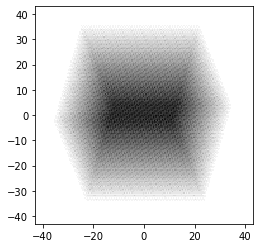

In [53]:
plt.imshow(H.T,cmap='binary',extent=np.array(camera_range).flatten())

In [652]:
xedges

array([-44.   , -43.875, -43.75 , -43.625, -43.5  , -43.375, -43.25 ,
       -43.125, -43.   , -42.875, -42.75 , -42.625, -42.5  , -42.375,
       -42.25 , -42.125, -42.   , -41.875, -41.75 , -41.625, -41.5  ,
       -41.375, -41.25 , -41.125, -41.   , -40.875, -40.75 , -40.625,
       -40.5  , -40.375, -40.25 , -40.125, -40.   , -39.875, -39.75 ,
       -39.625, -39.5  , -39.375, -39.25 , -39.125, -39.   , -38.875,
       -38.75 , -38.625, -38.5  , -38.375, -38.25 , -38.125, -38.   ,
       -37.875, -37.75 , -37.625, -37.5  , -37.375, -37.25 , -37.125,
       -37.   , -36.875, -36.75 , -36.625, -36.5  , -36.375, -36.25 ,
       -36.125, -36.   , -35.875, -35.75 , -35.625, -35.5  , -35.375,
       -35.25 , -35.125, -35.   , -34.875, -34.75 , -34.625, -34.5  ,
       -34.375, -34.25 , -34.125, -34.   , -33.875, -33.75 , -33.625,
       -33.5  , -33.375, -33.25 , -33.125, -33.   , -32.875, -32.75 ,
       -32.625, -32.5  , -32.375, -32.25 , -32.125, -32.   , -31.875,
       -31.75 , -31.

In [10]:
rayverts

array([[-43.9375, -43.9375],
       [-43.9375, -43.8125],
       [-43.9375, -43.6875],
       ...,
       [ 43.9375,  43.6875],
       [ 43.9375,  43.8125],
       [ 43.9375,  43.9375]])